<a href="https://colab.research.google.com/github/shuvo8220/AI-Mental-Health-Assistants-with-voice_audio_and-video-analysis-/blob/main/AI_Mental_Health_Assistants_from_Doctor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install streamlit
!pip install whisper
!pip install gTTS

In [ ]:
import streamlit as st
import torch
import whisper
from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline
from gtts import gTTS
import os
import tempfile

In [ ]:
# Set device
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
!pip install bitsandbytes

In [ ]:
# Load fine-tuned mental health model
model_id = "saha6754/mental_health_finetuned"
tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForCausalLM.from_pretrained(model_id) # Remove .to(DEVICE)
# The accelerate library will automatically handle device placement
pipe = pipeline("text-generation", model=model, tokenizer=tokenizer) # Remove device argument

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Device set to use cuda:0


In [ ]:
# 2. Install OpenAI's official Whisper from GitHub
!pip install git+https://github.com/openai/whisper.git

  Cloning https://github.com/openai/whisper.git to /tmp/pip-req-build-kozbpurt
  Running command git clone --filter=blob:none --quiet https://github.com/openai/whisper.git /tmp/pip-req-build-kozbpurt
  Resolved https://github.com/openai/whisper.git to commit 517a43ecd132a2089d85f4ebc044728a71d49f6e
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
import whisper
whisper_model = whisper.load_model("medium", device=DEVICE)
print("✅ Whisper model loaded!")

100%|█████████████████████████████████████| 1.42G/1.42G [00:25<00:00, 59.9MiB/s]


✅ Whisper model loaded!


In [ ]:
# Function to transcribe audio using Whisper
def transcribe_audio(audio_path):
    audio = whisper.load_audio(audio_path)
    audio = whisper.pad_or_trim(audio)
    mel = whisper.log_mel_spectrogram(audio).to(DEVICE)
    _, probs = whisper_model.detect_language(mel)
    options = whisper.DecodingOptions()
    result = whisper.decode(whisper_model, mel, options)
    return result.text

In [ ]:
# Function to generate mental health response
def generate_response(user_input):
    prompt = f"""
You are a supportive and compassionate mental health assistant.
Listen to the user's concern and respond with empathy and helpful guidance.

USER: {user_input}
ASSISTANT:
"""
    result = pipe(prompt, max_new_tokens=200, do_sample=True)
    return result[0]["generated_text"].split("ASSISTANT:")[-1].strip()

In [ ]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 MB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 25.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 53.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 6.1 MB/s eta 0:00:00


In [ ]:
import gradio as gr

# Function to convert text to speech
def text_to_speech(text, filename="response.mp3"):
    tts = gTTS(text)
    tts.save(filename)
    return filename

# Gradio UI
def mental_health_chatbot(audio, text_input):
    if audio is not None:
        # Temporary file to save audio
        with tempfile.NamedTemporaryFile(delete=False, suffix=".mp3") as temp_audio:
            temp_audio.write(audio.read())
            temp_audio_path = temp_audio.name

        user_text = transcribe_audio(temp_audio_path)
    elif text_input:
        user_text = text_input
    else:
        user_text = "No input provided"

    response = generate_response(user_text)
    audio_response = text_to_speech(response)

    return response, audio_response

# Set up Gradio interface
iface = gr.Interface(
    fn=mental_health_chatbot,
    inputs=[
        gr.Audio(type="filepath", label="Record or Upload Audio"),
        gr.Textbox(placeholder="Type your message here", label="Or type your message"),
    ],
    outputs=[gr.Textbox(label="Response"), gr.Audio(label="Assistant's Response")],
    live=True,
    title="🧠 Mental Health Chatbot with Voice",
    description="Speak your thoughts or type your concerns and receive an empathetic response.",
)

iface.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://db65a9411460a72f70.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
# ✅ Install Whisper + Dependencies
!pip install git+https://github.com/openai/whisper.git
!pip install pydub

# ✅ Imports
import whisper
from pydub import AudioSegment
import os

# ✅ Convert video to 16kHz mono WAV
video_path_mp4 = "/content/drive/MyDrive/Psychiatric Interviews for Teaching_ Depression.mp4"
audio_path_wav = "/content/audio.wav"

audio = AudioSegment.from_file(video_path_mp4, format="mp4")
audio = audio.set_frame_rate(16000).set_channels(1)
audio.export(audio_path_wav, format="wav")

# ✅ Load Whisper lightweight model
model = whisper.load_model("tiny.en")  # You can try "base" or "small" for better output

# ✅ Transcribe
result = model.transcribe(audio_path_wav)

# ✅ Output
print("\n🔹 Final Transcription:\n")
print(result["text"])

  Cloning https://github.com/openai/whisper.git to /tmp/pip-req-build-xg4sxrcb
  Running command git clone --filter=blob:none --quiet https://github.com/openai/whisper.git /tmp/pip-req-build-xg4sxrcb
  Resolved https://github.com/openai/whisper.git to commit 517a43ecd132a2089d85f4ebc044728a71d49f6e
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


100%|█████████████████████████████████████| 72.1M/72.1M [00:26<00:00, 2.89MiB/s]



🔹 Final Transcription:

 Hello, Alison Wells, don't come and have a seat. Hi, I'm Dr Taylor, one of those GPs at this surgery. What would you like me to call you? I saw you before. Okay. Okay. So what's put you here today, Alison? Um, this is just, I'm just a bit fadder, really. Right. Can sisters have, um, should come. Right. Okay. Has this been going on for some time? Yeah, a few months. Okay. Do you want to tell me a bit more about what's been going on? Um, just seems to be piling up. Right. I just don't seem to be coping with anything. Right. Okay. The kids and the things. Right. Okay. Would it be okay, Alison, for me to ask you a few more detailed questions about how you've been feeling? Okay. But if we start with asking you a bit about your mood, how have you been feeling in yourself? Um, I'm so a bit fadder, couple in the morning. Everything just seems very black. Right. It's like, it's just like swimming in a tree corner and then I just don't, I just, I think by a teacher I'm 

In [ ]:
# ✅ Load Summarization Pipeline
from transformers import pipeline # Import the pipeline function from transformers
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

# ✅ Split text if too long (BART has 1024 token limit)
def split_text(text, max_words=500):
    words = text.split()
    return [" ".join(words[i:i+max_words]) for i in range(0, len(words), max_words)]

# Assuming 'result' contains the transcription from the previous cell
transcript = result["text"]  # Assign the transcribed text to 'transcript'
text_chunks = split_text(transcript)

# ✅ Summarize each chunk
summary = []
for idx, chunk in enumerate(text_chunks):
    print(f"🔹 Summarizing chunk {idx+1}...")
    summary_text = summarizer(chunk, max_length=150, min_length=40, do_sample=False)[0]['summary_text']
    summary.append(summary_text)

# ✅ Final summary
final_summary = "\n".join(summary)
print("\n🔹 Final Summary:\n")
print(final_summary)

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cuda:0


🔹 Summarizing chunk 1...
🔹 Summarizing chunk 2...
🔹 Summarizing chunk 3...
🔹 Summarizing chunk 4...
🔹 Summarizing chunk 5...

🔹 Final Summary:

Alison Wells says she is feeling very low and with episodes of tearfulness. She says she spends the day on the sofa really, myself to go to work. The supermarket's been taking over and I've cut the wages, she says.
Alison used to have a way problem with her appetite. But in the last couple of months, she says, she's lost a lot of it. She also admits to being a bit useless with her children. Alison's new book is due to be released in the UK on September 14.
Alison has been feeling low for the last few months. She took paracetam to help her sleep and eat. But it also left her struggling with the kids and with her relationship. She talks about how this affected her relationship with her current partner.
Have you thought about either taking a an overdose or doing something else to harm yourself in any way? Have you actually made any plans, got any 

<ipython-input-14-6e198aa852d9>:71: UserWarning: Glyph 129728 (\N{ANATOMICAL HEART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-14-6e198aa852d9>:71: UserWarning: Glyph 128993 (\N{LARGE YELLOW CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-14-6e198aa852d9>:71: UserWarning: Glyph 128992 (\N{LARGE ORANGE CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129728 (\N{ANATOMICAL HEART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128993 (\N{LARGE YELLOW CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128992 (\N{LARGE ORANGE CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_

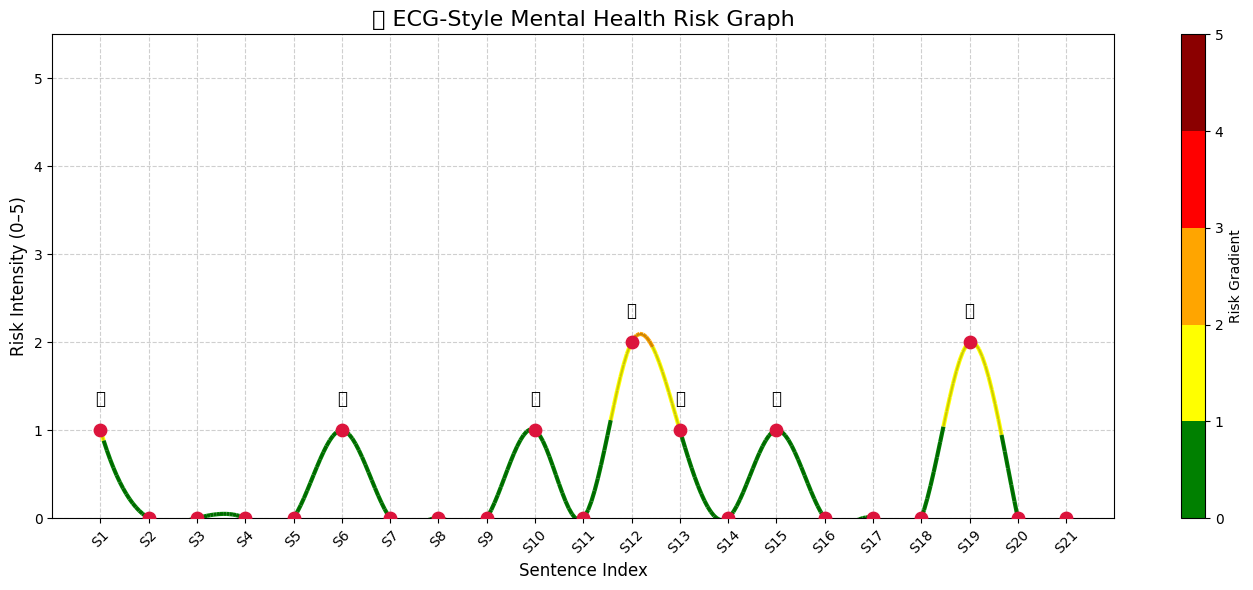

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import re
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

# ✅ Define risk keywords (same as before)
risk_keywords = {
    "suicidal": ["suicide", "kill myself", "ending life", "want to die", "hopeless",
                 "overdose", "take the children with me", "die", "best thing might be"],
    "self_harm": ["cutting", "self-harm", "hurt myself", "pain", "burning",
                  "harm yourself", "take tablets", "done anything else"],
    "severe_depression": ["worthless", "no purpose", "can't go on", "deep sadness", "severe depression",
                          "feeling very low", "useless", "struggling", "not much really"],
    "anxiety": ["panic", "anxious", "fear", "worry", "racing thoughts", "don’t feel right"],
    "isolation": ["alone", "isolated", "no one", "nobody", "ignored", "abandoned", "on your own"]
}

# ✅ Scoring function
def analyze_sentence_risk(sentence, risk_map):
    lowered = sentence.lower()
    risk_score = 0
    for keywords in risk_map.values():
        for kw in keywords:
            if kw in lowered:
                risk_score += 1
                break
    return risk_score

# ✅ Use summary and split
sentences = re.split(r'(?<=[.!?])\s+', final_summary.strip())
risk_scores = [analyze_sentence_risk(s, risk_keywords) for s in sentences]
x = np.arange(len(sentences))

# ✅ Smoothing effect (optional, for beauty)
from scipy.interpolate import make_interp_spline

x_smooth = np.linspace(x.min(), x.max(), 300)
spline = make_interp_spline(x, risk_scores, k=3)
risk_smooth = spline(x_smooth)

# ✅ Gradient ECG Line
points = np.array([x_smooth, risk_smooth]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

norm = plt.Normalize(0, 5)
cmap = ListedColormap(['green', 'yellow', 'orange', 'red', 'darkred'])
lc = LineCollection(segments, cmap=cmap, norm=norm)
lc.set_array(risk_smooth)
lc.set_linewidth(3)

# ✅ Plot ECG style
plt.figure(figsize=(14, 6))
plt.gca().add_collection(lc)
plt.plot(x_smooth, risk_smooth, alpha=0.2, color='black')  # soft shadow
plt.scatter(x, risk_scores, color='crimson', s=80, zorder=5)

# ✅ Emoji annotations
emoji_level = {0: "🟢", 1: "🟡", 2: "🟠", 3: "🔴", 4: "🚨", 5: "🆘"}
for i, score in enumerate(risk_scores):
    if score > 0:
        plt.text(x[i], score + 0.3, emoji_level.get(score, ""), fontsize=12, ha='center')

# ✅ Styling
plt.xticks(x, [f"S{i+1}" for i in x], rotation=45)
plt.ylim(0, 5.5)
plt.xlabel("Sentence Index", fontsize=12)
plt.ylabel("Risk Intensity (0–5)", fontsize=12)
plt.title("🫀 ECG-Style Mental Health Risk Graph", fontsize=16)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.colorbar(lc, label="Risk Gradient", orientation='vertical')
plt.show()



  if event.key is 'enter':



MoviePy - Writing audio in extracted_audio.wav


MoviePy - Done.


  plt.tight_layout()

  fig.canvas.print_figure(bytes_io, **kw)



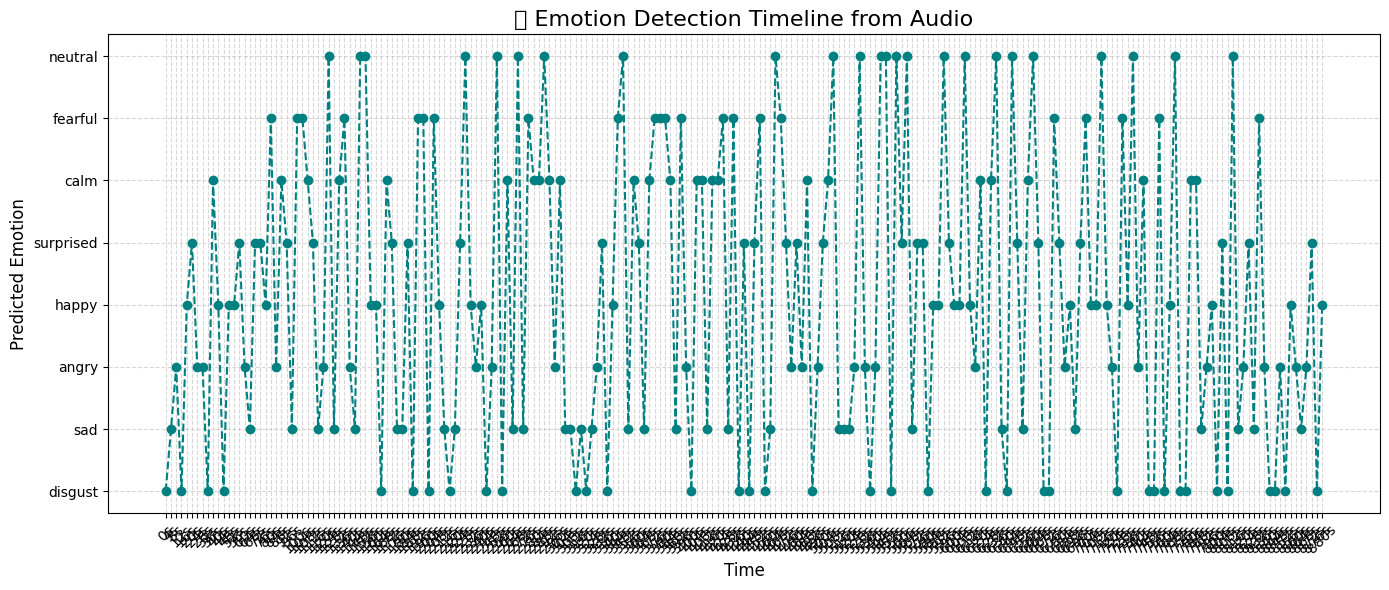

In [ ]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
from moviepy.editor import VideoFileClip
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import soundfile as sf

# ✅ Step 1: Extract audio from MP4
video_path = "/content/drive/MyDrive/Psychiatric Interviews for Teaching_ Depression.mp4"
audio_path = "extracted_audio.wav"

video = VideoFileClip(video_path)
audio = video.audio
audio.write_audiofile(audio_path, codec='pcm_s16le')

# ✅ Step 2: Load and segment audio
y, sr = librosa.load(audio_path, sr=22050)
segment_duration = 4  # in seconds
segment_samples = segment_duration * sr
segments = [y[i:i + segment_samples] for i in range(0, len(y), segment_samples) if len(y[i:i + segment_samples]) == segment_samples]

# ✅ Step 3: Extract MFCC features per segment
def extract_features(signal, sr):
    mfccs = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=13)
    return np.mean(mfccs.T, axis=0)

X = np.array([extract_features(seg, sr) for seg in segments])

# ✅ Step 4: Dummy Emotion Classifier (for demonstration)
# You should replace this with your own pre-trained model
emotions = ['neutral', 'calm', 'happy', 'sad', 'angry', 'fearful', 'disgust', 'surprised']
np.random.seed(42)  # Just for repeatability
y_pred = np.random.choice(emotions, size=len(X))

# ✅ Step 5: Visualization
time_points = [i * segment_duration for i in range(len(y_pred))]

plt.figure(figsize=(14, 6))
plt.plot(time_points, y_pred, marker='o', linestyle='--', color='teal')
plt.xticks(time_points, [f"{t}s" for t in time_points], rotation=45)
plt.title("🗣️ Emotion Detection Timeline from Audio", fontsize=16)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Predicted Emotion", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



